In [18]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors

from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

from scipy import stats 
import scipy.stats as stat
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, peak_prominences, peak_widths
from scipy.stats import linregress

import itertools

import helperfile as hf

In [9]:
mu1 = np.loadtxt('Mu1.txt', dtype=float, delimiter=',')
mu2 = np.loadtxt('Mu2.txt', dtype=float, delimiter=',')
var_mu1 = np.loadtxt('VarMu1.txt', dtype=float, delimiter=',')
var_mu2 = np.loadtxt('VarMu2.txt', dtype=float, delimiter=',')



In [20]:
mu = np.append(mu1,mu2)
var_mu = np.append(var_mu1,var_mu2)
sig_mu = np.sqrt(var_mu)

In [13]:
def MuWeighAv_Varmu(mu_i, var_mu): 
    t1 = mu_i/var_mu
    sum1 = np.sum(t1)

    t2 = 1/var_mu
    sum2 = np.sum(t2)
    t3 = 1/sum2

    mu_av = sum1*t3
    return mu_av, t3

In [15]:
mu_av, var_mu_av = MuWeighAv_Varmu(mu, var_mu)

sig_mu_av = np.sqrt(var_mu_av)
print(f'{mu_av} +/- {sig_mu_av}')

8.479344206124258e-21 +/- 7.479445727205596e-23


In [22]:
print('True Value: ')
print(9.2741E-21)
tru = 9.2741E-21
print('\nPercent error:')
percentage_error = (np.abs(9.2741E-21-mu_av)/9.2741E-21)*100
print(percentage_error)

True Value: 
9.2741e-21

Percent error:
8.569627175421246


$\chi$

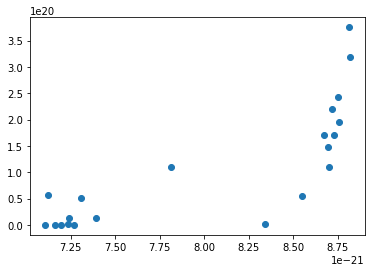

In [26]:
y_untransformed = stats.norm.pdf(mu, tru, sig_mu) 
plt.scatter(mu,y_untransformed,label ="Nomalized Distribution")
